# StateModelRnD

There are two methods for using StateModelRnD, one is to install the python package on your computer and to write python scripts solve and interact with the solution. The other is to use the web interface. This notebook will focus on how to interact with StateModelRnD in a python script.

Before we begin we need to import a few libraries, including `StateModelRnD`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import StateModelRnD
from StateModelRnD import to_numpy
import sympy
sympy.init_printing()
%matplotlib inline

Now that the required libraries have been imported we can start working on a problem. In this case we will be working on the problem set forth in the [tutorial](https://github.com/CameronDevine/StateModelRnD/blob/tutorial/tutorial.md). This problem consists of a motor powering a pump through a flexible shaft. This pump pushes water through an enbow with a known resistance and out into the atmosphere. A diagram of the physical system can be seen below,

![system](http://raw.githubusercontent.com/CameronDevine/StateModelRnD/master/web/HTML/tutorial/tutorial1.svg?sanitize=true)

The following equations for this system were found in the tutorial:

In [2]:
InVars = [
    'Vs']
StVarElEqns = [
    "tk' = kt * wk"]
OtherElEqns = [
    'vR = R * iR',
    "vL = L * iL'",
    'i1 = -Kv * t2',
    'w2 = Kv * v1',
    'w3 = Q4 / -D',
    'P4 = t3 / D',
    'QR = PR / Rf']
Constraints = [
    'iL = i1',
    'iR = i1',
    't2 = -tk',
    't3 = tk',
    'Q4 = QR',
    'v1 = Vs - vR - vL',
    'wk = w2 - w3',
    'PR = P4']
OutputVars = [
    'QR']

Now using the `StateModelRnD.Solve` command the solution can be found.

In [3]:
sys = StateModelRnD.Solve(InVars, StVarElEqns, OtherElEqns, Constraints, OutputVars)

Now that the solution has been found, different parts of the equation can be viewed including the $A$ matrix,

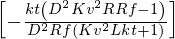

In [4]:
sys.A

the state equation,

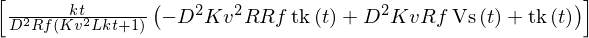

In [5]:
sys.StateEq

or the transfer function,

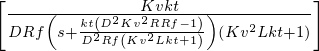

In [6]:
sys.TF

The results can also be viewed in other languages such as LaTeX,

In [7]:
print(sympy.latex(sys.A))

\left[\begin{matrix}- \frac{kt \left(D^{2} Kv^{2} R Rf - 1\right)}{D^{2} Rf \left(Kv^{2} L kt + 1\right)}\end{matrix}\right]


or Matlab,

In [8]:
print(sympy.octave_code(sys.A))

-kt.*(D.^2.*Kv.^2.*R.*Rf - 1)./(D.^2.*Rf.*(Kv.^2.*L.*kt + 1))


Other `sympy` functions can also be used to manipulate the equations if desired. However at this point we will substitute in values for the constants to allow us to simulate the system. This process starts by defining the values for each constant.

In [9]:
Values = {
    'R': 5,
    'L': 0.1,
    'Kv': 1000,
    'kt': 10,
    'D': 0.0015,
    'Rf': 4e6
}

Now the state equation matricies can be converted to `numpy` matricies.

In [10]:
A = to_numpy.matrix(sys.A, Values)
B = to_numpy.matrix(sys.B, Values)
C = to_numpy.matrix(sys.C, Values)
D = to_numpy.matrix(sys.D, Values)

A Forward Euler method can now be used to simulate the system given the initial condition `x0`.

In [11]:
dt = 0.0001
x0 = np.matrix([[0]])
tf = 0.15
Vs = np.matrix([[12]])

x = np.matrix(np.ndarray((A.shape[0], int(tf/dt) + 1)))
y = np.matrix(np.ndarray((C.shape[0], int(tf/dt) + 1)))

x[:,0] = x0
y[:,0] = C * x0 + D * Vs
for i in range(int(tf/dt)):
    x[:,i+1] = x[:,i] + dt * (A * x[:,i] + B * Vs)
    y[:,i+1] = C * x[:,i+1] + D * Vs

This data can now be plotted to view the system's time response.

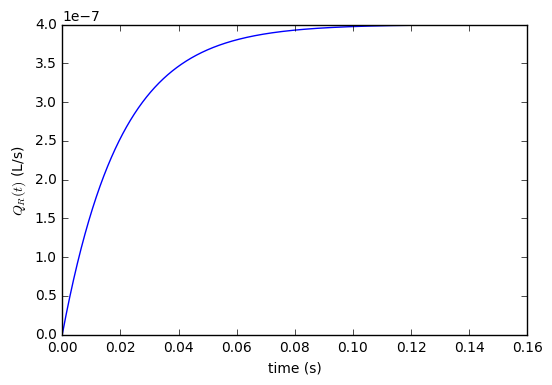

In [12]:
plt.plot(np.arange(0, tf, dt), y.T.A[:,0])
plt.ylabel('$Q_R(t)$ (L/s)')
plt.xlabel('time (s)')